In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()

In [3]:
un = pd.read_csv("UnemploymentinIndia.csv")

In [4]:
un.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural


In [7]:
un.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int64  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


In [8]:
un.nunique()

Region                                       28
 Date                                        14
 Frequency                                    2
 Estimated Unemployment Rate (%)            624
 Estimated Employed                         740
 Estimated Labour Participation Rate (%)    626
Area                                          2
dtype: int64

In [9]:
un.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
un.drop(columns=[" Date"],inplace=True)

In [11]:
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Frequency                                740 non-null    object 
 2    Estimated Unemployment Rate (%)          740 non-null    float64
 3    Estimated Employed                       740 non-null    int64  
 4    Estimated Labour Participation Rate (%)  740 non-null    float64
 5   Area                                      740 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.8+ KB


In [12]:
un.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,Monthly,5.17,12256762,44.68,Rural


In [13]:
un["Region"] = le.fit_transform(un["Region"])
un[" Frequency"] = le.fit_transform(un[" Frequency"])
un["Area"] = le.fit_transform(un["Area"])

In [14]:
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    int32  
 1    Frequency                                740 non-null    int32  
 2    Estimated Unemployment Rate (%)          740 non-null    float64
 3    Estimated Employed                       740 non-null    int64  
 4    Estimated Labour Participation Rate (%)  740 non-null    float64
 5   Area                                      740 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 26.1 KB


In [15]:
un.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,0,0,3.65,11999139,43.24,0
1,0,0,3.05,11755881,42.05,0
2,0,0,3.75,12086707,43.50,0
3,0,0,3.32,12285693,43.97,0
4,0,0,5.17,12256762,44.68,0


In [16]:
correlation_mat = un.corr()

In [17]:
correlation_mat

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Region,1.000000,-0.013472,-0.056726,0.210371,0.169119,-0.013472
Frequency,-0.013472,1.000000,0.132563,-0.358902,-0.219717,1.000000
Estimated Unemployment Rate (%),-0.056726,0.132563,1.000000,-0.222876,0.002558,0.132563
Estimated Employed,0.210371,-0.358902,-0.222876,1.000000,0.011300,-0.358902
Estimated Labour Participation Rate (%),0.169119,-0.219717,0.002558,0.011300,1.000000,-0.219717
Area,-0.013472,1.000000,0.132563,-0.358902,-0.219717,1.000000


<Axes: >

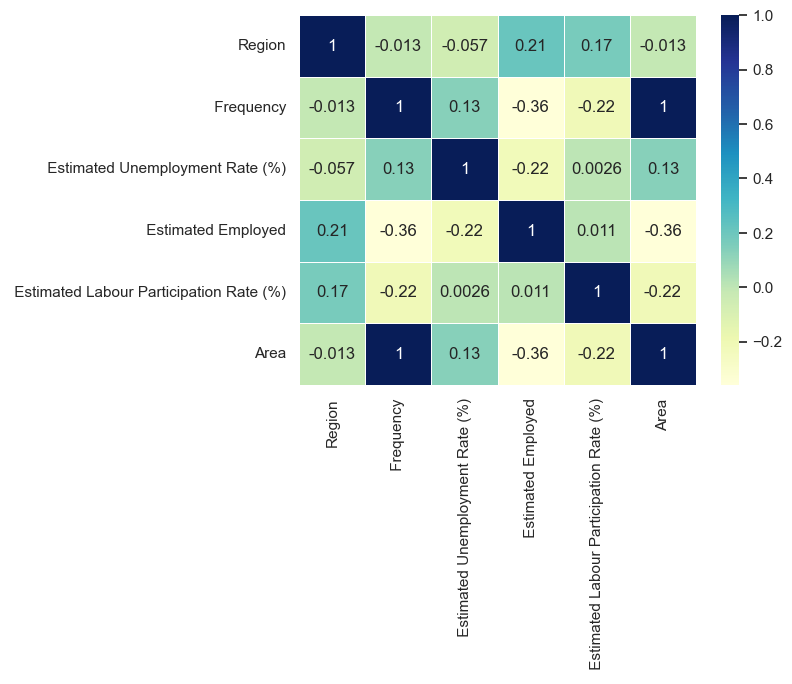

In [18]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

In [19]:
X = un.drop(columns=[" Estimated Unemployment Rate (%)"])
Y = un[" Estimated Unemployment Rate (%)"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)

7.736526815539639

In [22]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

125.77114041954192

In [23]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

676785376485005.9